<a href="https://colab.research.google.com/github/VitorLeitao/IF679---Analise-Bank-Churn/blob/main/TesteHipotese_%26_AnaliseExploratoria" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados preprocessados
df = pd.read_csv("/content/churn_transformed.csv")

## 1. Gerando Estatísticas

In [2]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_norm,EstimatedSalary_norm,Balance_norm,Credit_per_age,isOutlier
count,9978.000000,9.978000e+03,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.0
mean,4999.866306,1.569081e+07,651.154941,38.747043,5.011425,78653.731883,1.477050,0.736119,0.564943,100099.375738,0.181600,0.602310,0.500291,0.313489,17.842817,1.0
std,2737.254869,6.820777e+04,91.464445,9.919045,2.739184,59550.825107,0.574355,0.440757,0.495789,54616.540028,0.385533,0.182929,0.273216,0.237351,5.059302,0.0
min,2.000000,1.556570e+07,358.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.016000,0.000000,0.000000,6.112676,1.0
25%,2782.250000,1.563545e+07,592.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,56584.210000,0.000000,0.484000,0.282609,0.000000,14.433299,1.0
50%,4988.500000,1.569053e+07,652.000000,37.000000,5.000000,97221.520000,1.000000,1.000000,1.000000,100272.165000,0.000000,0.604000,0.501155,0.387494,17.405405,1.0
75%,7218.750000,1.574669e+07,710.000000,43.000000,7.000000,124507.252500,2.000000,1.000000,1.000000,143959.287500,0.000000,0.720000,0.719697,0.496246,20.605861,1.0
max,10000.000000,1.581569e+07,850.000000,81.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,41.750000,1.0


## 2. Relação univariáveis

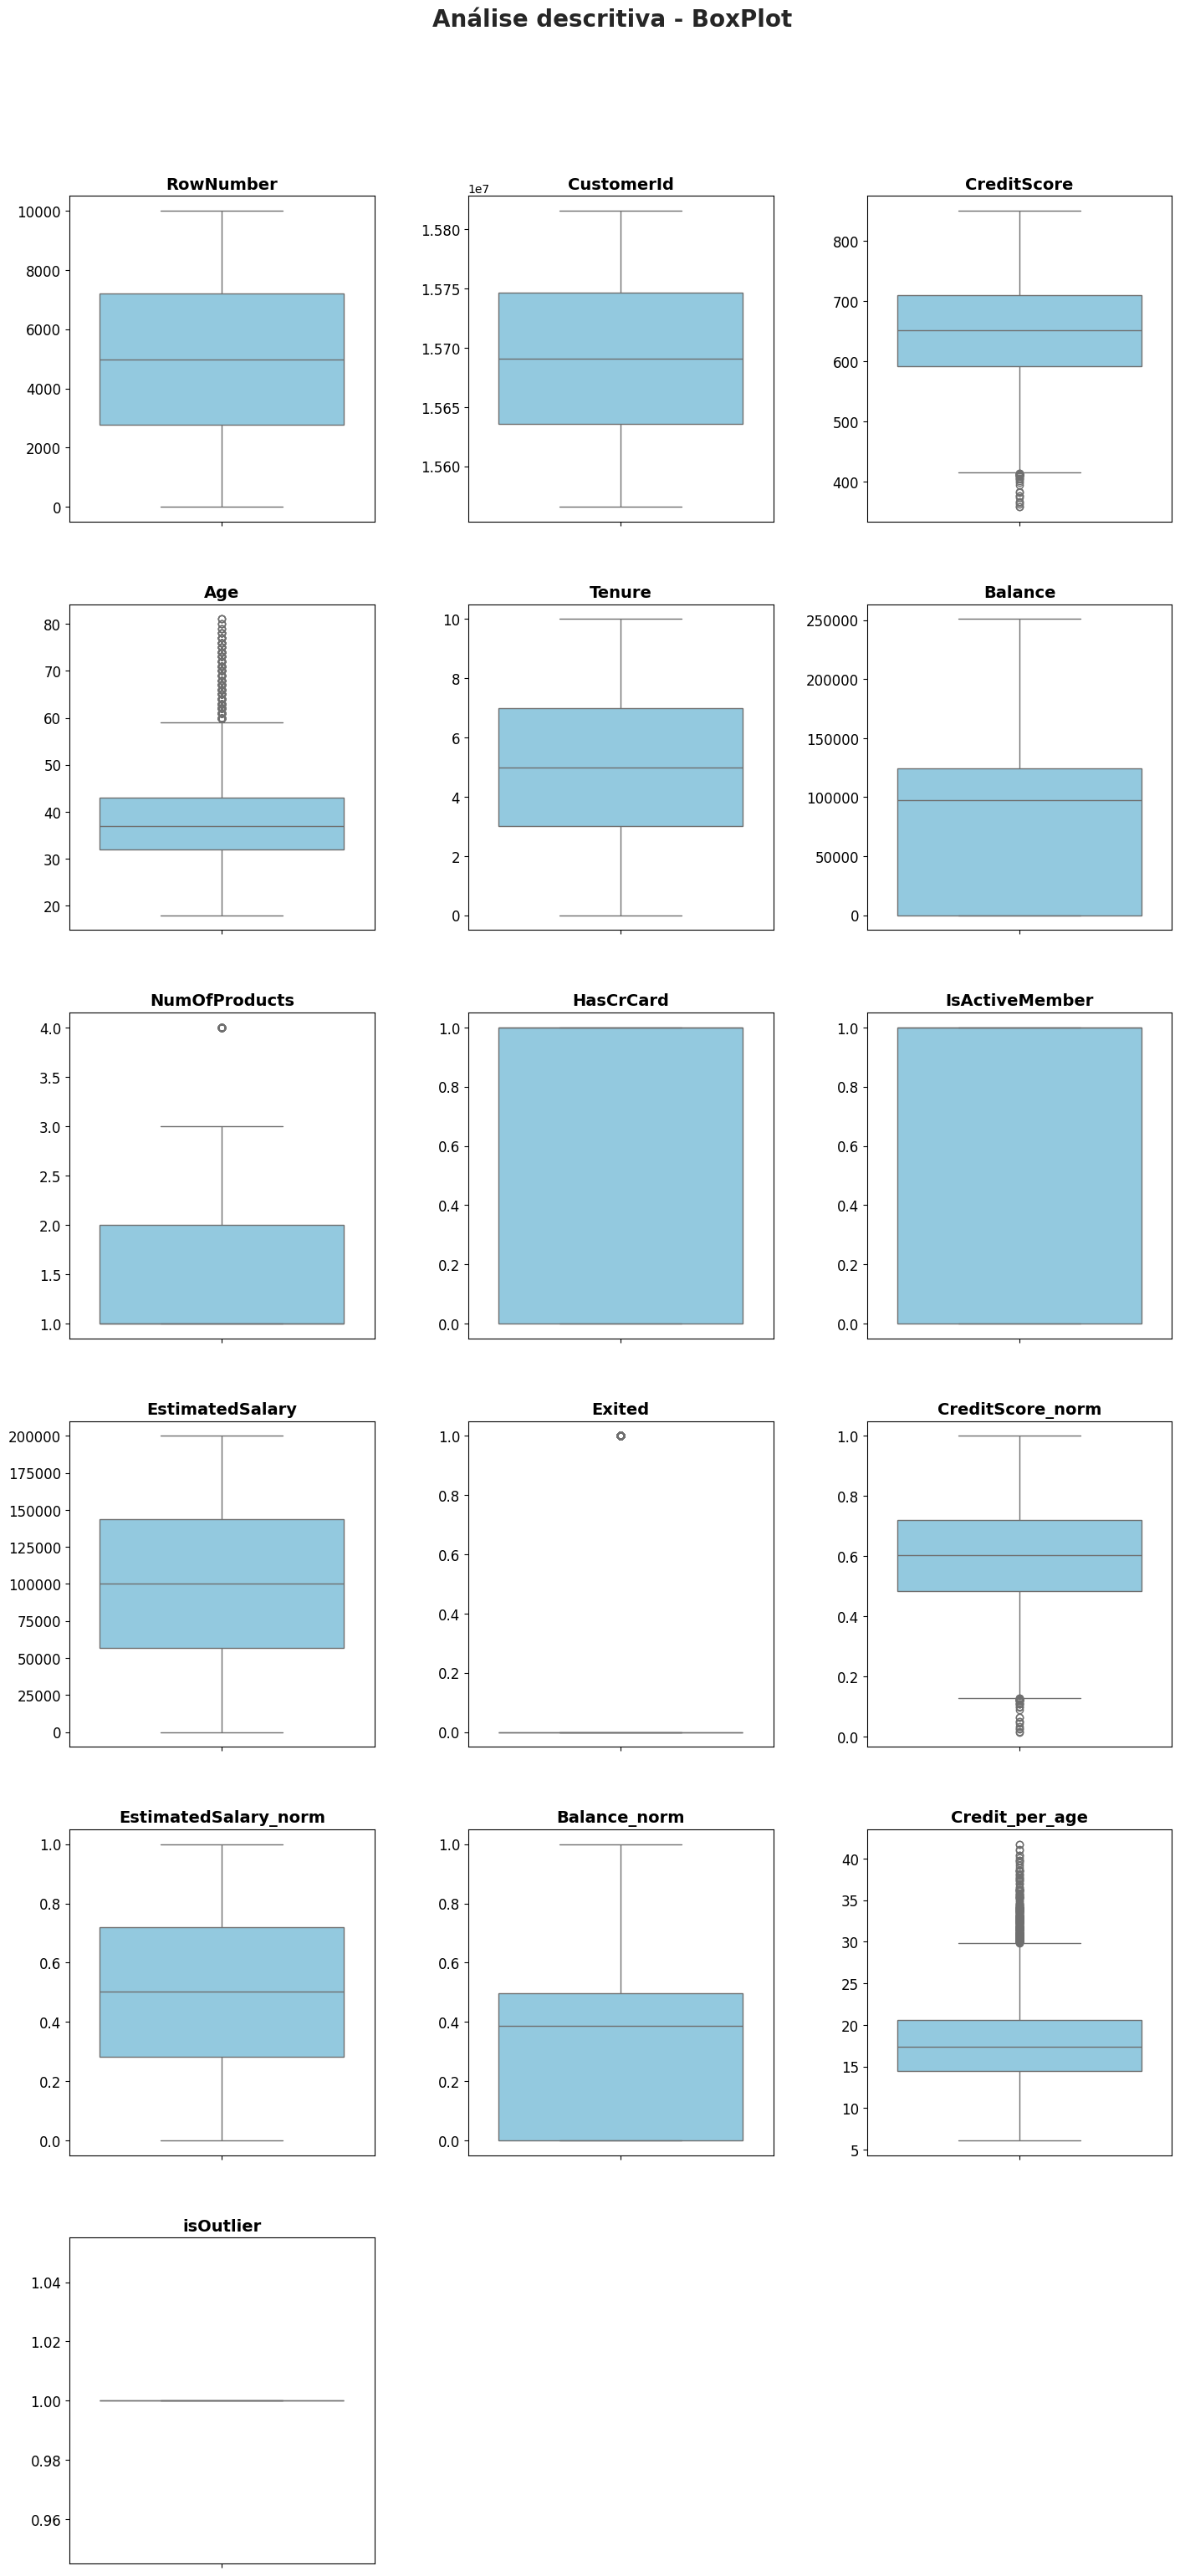

In [3]:
def box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
box_plot(df)


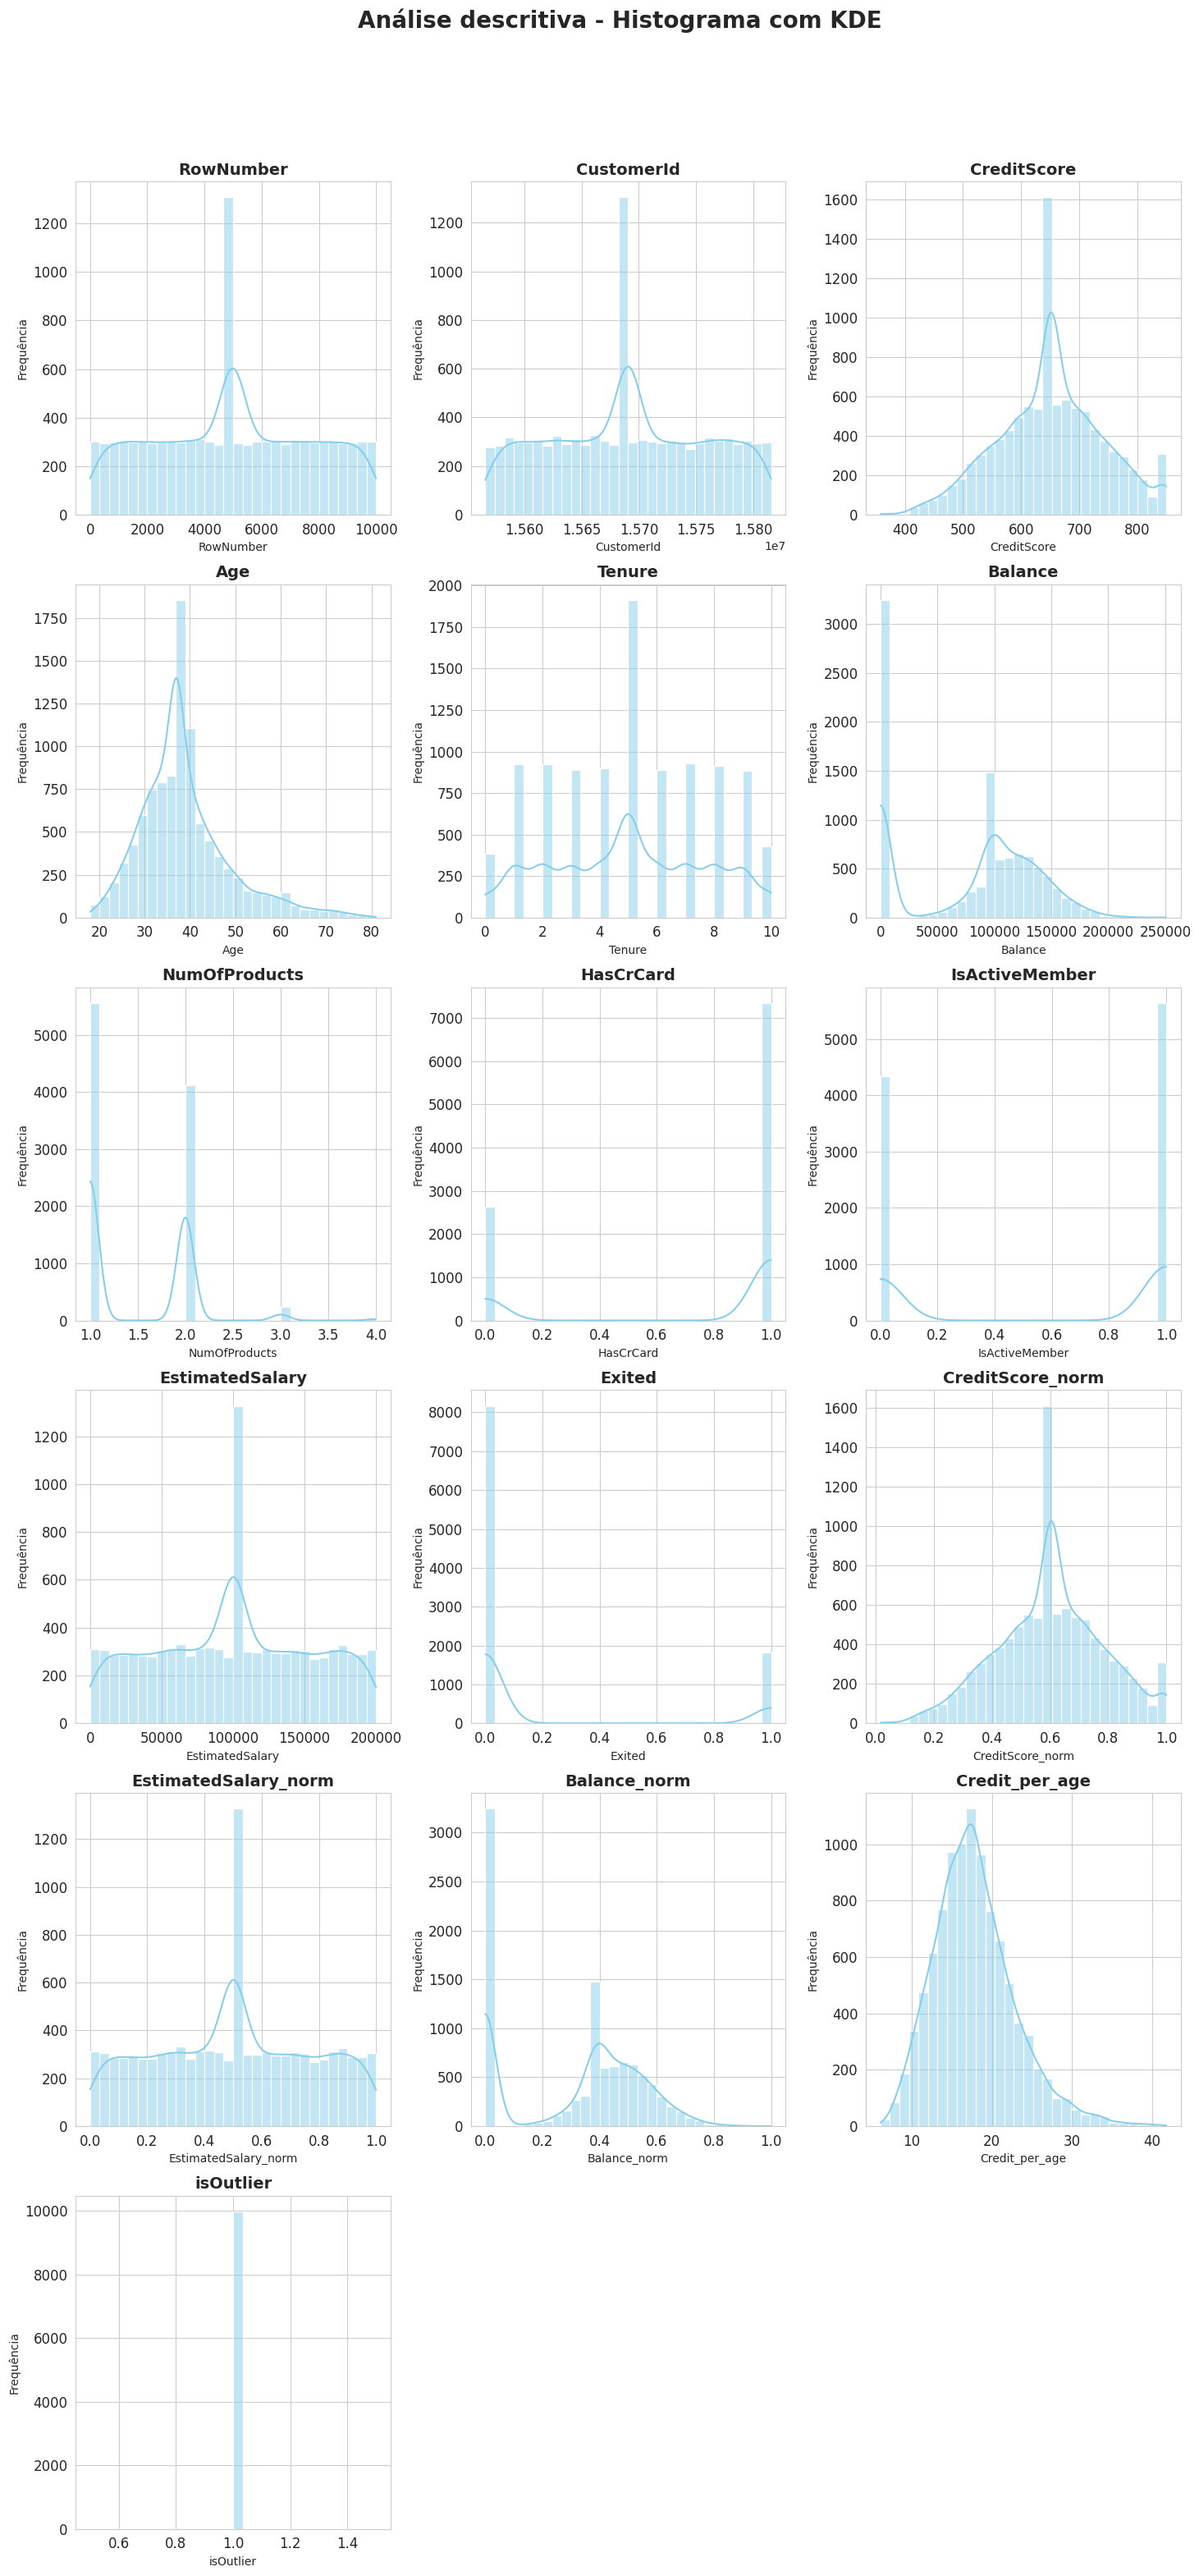

In [4]:
def histograms(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
histograms(df)

## 3. Relação bidimensional

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Surname', 'Geography', 'Gender', 'CreditScore_norm',
       'EstimatedSalary_norm', 'Balance_norm', 'Credit_per_age', 'isOutlier'],
      dtype='object')

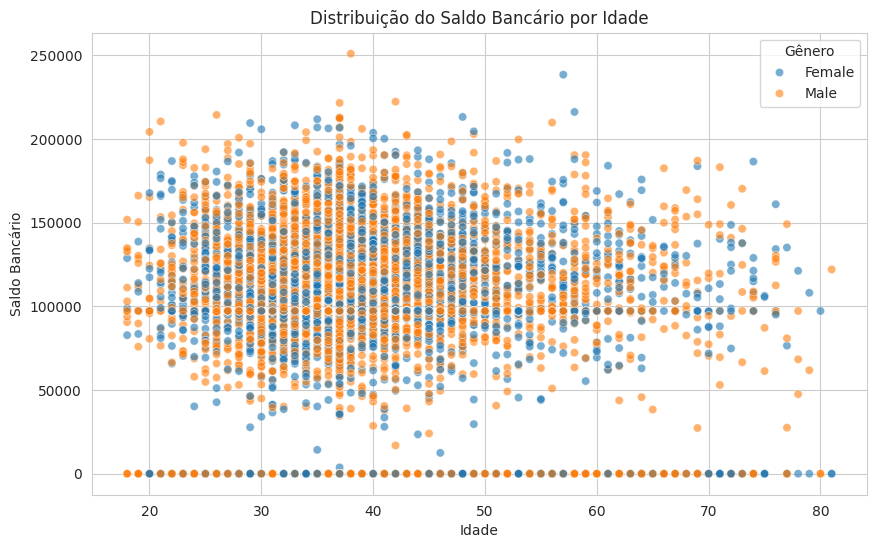

In [8]:
# 1. Distribuição do saldo bancário por idade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Gender', data=df, alpha=0.6)
plt.title('Distribuição do Saldo Bancário por Idade')
plt.xlabel('Idade')
plt.ylabel('Saldo Bancário')
plt.legend(title='Gênero')
plt.show()


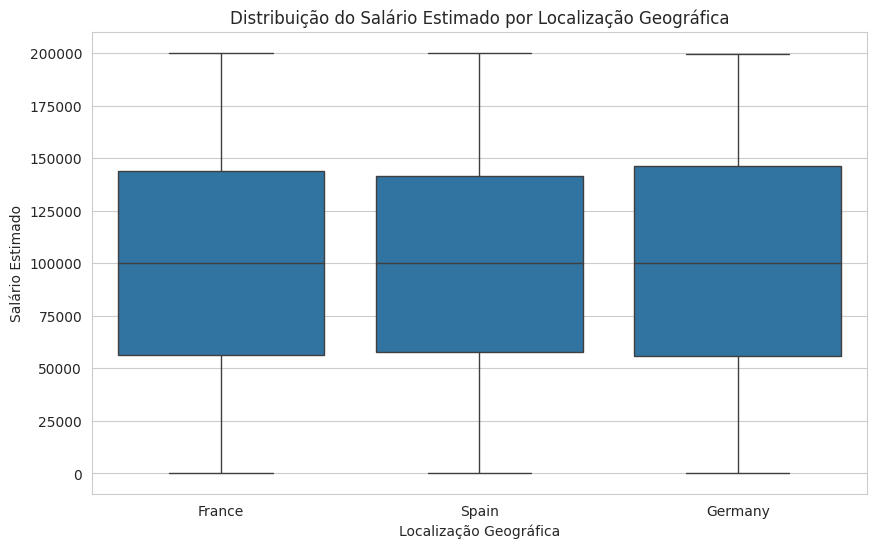

In [11]:
# 2. Distribuição do salário estimado por localização geográfica
plt.figure(figsize=(10, 6))
sns.boxplot(x='Geography', y='EstimatedSalary', data=df)
plt.title('Distribuição do Salário Estimado por Localização Geográfica')
plt.xlabel('Localização Geográfica')
plt.ylabel('Salário Estimado')
plt.show()



## 4. Relações multivariáveis

Nesse caso, faremos uma matriz de correlação de Pearson

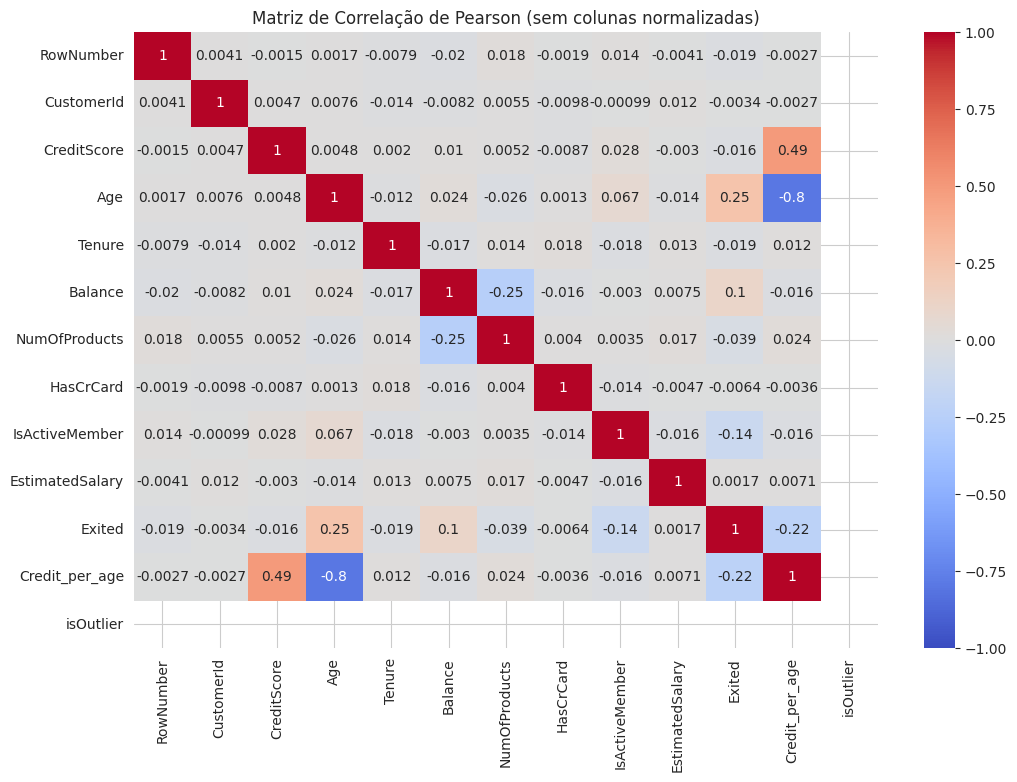

In [16]:
# Selecionar apenas as colunas numéricas e remover as colunas normalizadas
columns_to_exclude = ['CreditScore_norm', 'EstimatedSalary_norm', 'Balance_norm']
numeric_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in columns_to_exclude]
df_numeric = df[numeric_columns]

# Calcular a matriz de correlação de Pearson
correlation_matrix = df_numeric.corr(method='pearson')

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlação de Pearson (sem colunas normalizadas)')
plt.show()

## 5. Testes de Hipóteses:


In [17]:
from scipy.stats import ttest_ind


# 1. Comparação do saldo bancário entre gêneros
balance_male = df[df['Gender'] == 'Male']['Balance']
balance_female = df[df['Gender'] == 'Female']['Balance']

t_stat_balance, p_value_balance = ttest_ind(balance_male, balance_female)
print(f"Teste de Hipótese 1: Comparação do saldo bancário entre gêneros")
print(f"T-statistic: {t_stat_balance}, P-value: {p_value_balance}")


Teste de Hipótese 1: Comparação do saldo bancário entre gêneros
T-statistic: 1.3241674082801276, P-value: 0.1854777897080572


In [21]:
# 2. Comparação do número de produtos bancários entre clientes que saíram e que não saíram
num_products_exited = df[df['Exited'] == 1]['NumOfProducts']# 2. Comparação do número de produtos bancários entre clientes que saíram e que não saíram
num_products_exited = df[df['Exited'] == 1]['NumOfProducts']
num_products_not_exited = df[df['Exited'] == 0]['NumOfProducts']

t_stat_products, p_value_products = ttest_ind(num_products_exited, num_products_not_exited)
print(f"\nTeste de Hipótese 2: Comparação do número de produtos bancários entre clientes que saíram e que não saíram")
print(f"T-statistic: {t_stat_products}, P-value: {p_value_products}")
num_products_not_exited = df[df['Exited'] == 0]['NumOfProducts']



Teste de Hipótese 2: Comparação do número de produtos bancários entre clientes que saíram e que não saíram
T-statistic: -3.9097704222798795, P-value: 9.299555588431702e-05


In [22]:
# 3. Comparação do salário estimado entre diferentes localizações geográficas
salary_france = df[df['Geography'] == 'France']['EstimatedSalary']
salary_germany = df[df['Geography'] == 'Germany']['EstimatedSalary']
salary_spain = df[df['Geography'] == 'Spain']['EstimatedSalary']

t_stat_salary_fr_de, p_value_salary_fr_de = ttest_ind(salary_france, salary_germany)
t_stat_salary_fr_sp, p_value_salary_fr_sp = ttest_ind(salary_france, salary_spain)
t_stat_salary_de_sp, p_value_salary_de_sp = ttest_ind(salary_germany, salary_spain)

print(f"\nTeste de Hipótese 3: Comparação do salário estimado entre diferentes localizações geográficas")
print(f"França vs Alemanha - T-statistic: {t_stat_salary_fr_de}, P-value: {p_value_salary_fr_de}")
print(f"França vs Espanha - T-statistic: {t_stat_salary_fr_sp}, P-value: {p_value_salary_fr_sp}")
print(f"Alemanha vs Espanha - T-statistic: {t_stat_salary_de_sp}, P-value: {p_value_salary_de_sp}")


Teste de Hipótese 3: Comparação do salário estimado entre diferentes localizações geográficas
França vs Alemanha - T-statistic: -1.0126108296151441, P-value: 0.31127768500419906
França vs Espanha - T-statistic: -0.030313330575903547, P-value: 0.975817949091169
Alemanha vs Espanha - T-statistic: 0.8251107949486325, P-value: 0.4093526230987671
